In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
from copy import deepcopy
import random
from kmeans import K_Means

In [2]:
df_bio = pd.read_csv('../data/column_2C_weka.csv')
df_bio.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
xAxis      = df_bio['pelvic_incidence']
xAxisLabel = 'Pelvic Incidence'
yAxis      = df_bio['pelvic_radius']
yAxisLabel = 'Pelvic Radius'
classVerify = df_bio['class']

In [4]:
#Feature enginering
if xAxis.min() == xAxis.max() or yAxis.min() == yAxis.max():
    raise Exeption('Cannot run K-Means without at-least 2 distinct data points')
xAxis -= xAxis.min()
xAxis /= xAxis.max()
xAxis = 4*xAxis - 2

yAxis -= yAxis.min()
yAxis /= yAxis.max()
yAxis = 4*yAxis - 2

K is 2


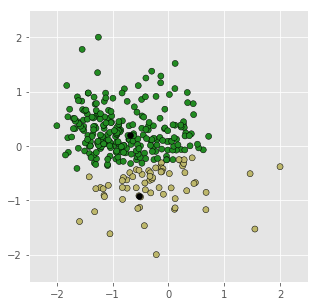

In [5]:

colmap = [name for name, hex in matplotlib.colors.cnames.items()]
random.Random(0).shuffle(colmap)
k = len(set(classVerify))
print("K is %s" % k)
kmeans = K_Means(xAxis, yAxis, classVerify)

classificationColors = []
for i in range(len(xAxis)):
    index = kmeans.predict(xAxis[i],yAxis[i])
    color = colmap[index]
    classificationColors.append(color)

fig = plt.figure(figsize=(5, 5))

plt.scatter(xAxis, yAxis, color=classificationColors, edgecolor='k')
plt.scatter([kmeans.centroids[i][0] for i in range(k)], [kmeans.centroids[i][1] for i in range(k)], color='k')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()